In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
from scipy import stats

warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("data.xlsx - Sheet1.csv")

print(data.head())

  Unnamed: 0      ID     Salary          DOJ          DOL  \
0      train  203097   420000.0  6/1/12 0:00      present   
1      train  579905   500000.0  9/1/13 0:00      present   
2      train  810601   325000.0  6/1/14 0:00      present   
3      train  267447  1100000.0  7/1/11 0:00      present   
4      train  343523   200000.0  3/1/14 0:00  3/1/15 0:00   

                Designation    JobCity Gender           DOB  10percentage  \
0   senior quality engineer  Bangalore      f  2/19/90 0:00          84.3   
1         assistant manager     Indore      m  10/4/89 0:00          85.4   
2          systems engineer    Chennai      f   8/3/92 0:00          85.0   
3  senior software engineer    Gurgaon      m  12/5/89 0:00          85.6   
4                       get    Manesar      m  2/27/91 0:00          78.0   

   ... ComputerScience  MechanicalEngg  ElectricalEngg TelecomEngg  CivilEngg  \
0  ...              -1              -1              -1          -1         -1   
1  ...  

In [3]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             3998 non-null   object 
 1   ID                     3998 non-null   int64  
 2   Salary                 3998 non-null   float64
 3   DOJ                    3998 non-null   object 
 4   DOL                    3998 non-null   object 
 5   Designation            3998 non-null   object 
 6   JobCity                3998 non-null   object 
 7   Gender                 3998 non-null   object 
 8   DOB                    3998 non-null   object 
 9   10percentage           3998 non-null   float64
 10  10board                3998 non-null   object 
 11  12graduation           3998 non-null   int64  
 12  12percentage           3998 non-null   float64
 13  12board                3998 non-null   object 
 14  CollegeID              3998 non-null   int64  
 15  Coll

In [4]:
data_cleaned = data.drop('Unnamed: 0', axis=1)
data_cleaned.columns = data_cleaned.columns.str.lower()

print(data_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 38 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     3998 non-null   int64  
 1   salary                 3998 non-null   float64
 2   doj                    3998 non-null   object 
 3   dol                    3998 non-null   object 
 4   designation            3998 non-null   object 
 5   jobcity                3998 non-null   object 
 6   gender                 3998 non-null   object 
 7   dob                    3998 non-null   object 
 8   10percentage           3998 non-null   float64
 9   10board                3998 non-null   object 
 10  12graduation           3998 non-null   int64  
 11  12percentage           3998 non-null   float64
 12  12board                3998 non-null   object 
 13  collegeid              3998 non-null   int64  
 14  collegetier            3998 non-null   int64  
 15  degr

In [5]:
data_cleaned['doj'] = pd.to_datetime(data_cleaned['doj'])
data_cleaned['dol'] = data_cleaned['dol'].apply(lambda x: "Left" if x != "present" else x)

In [6]:
data_cleaned['jobcity'] = data_cleaned['jobcity'].str.strip().str.lower()
city_mapping = {
    'banglore': 'bangalore',
    'bengaluru': 'bangalore',
    'delhi': 'new delhi',
}
data_cleaned['jobcity'] = data_cleaned['jobcity'].replace(city_mapping)

print(data_cleaned.isnull().sum())

id                       0
salary                   0
doj                      0
dol                      0
designation              0
jobcity                  0
gender                   0
dob                      0
10percentage             0
10board                  0
12graduation             0
12percentage             0
12board                  0
collegeid                0
collegetier              0
degree                   0
specialization           0
collegegpa               0
collegecityid            0
collegecitytier          0
collegestate             0
graduationyear           0
english                  0
logical                  0
quant                    0
domain                   0
computerprogramming      0
electronicsandsemicon    0
computerscience          0
mechanicalengg           0
electricalengg           0
telecomengg              0
civilengg                0
conscientiousness        0
agreeableness            0
extraversion             0
nueroticism              0
o

In [7]:
average_salary = data_cleaned['salary'].mean().round(2)
max_salary = data_cleaned['salary'].max()
min_salary = data_cleaned['salary'].min()
print(f"Average Salary: {average_salary}")
print(f"Max Salary: {max_salary}")
print(f"Min Salary: {min_salary}")

Average Salary: 307699.85
Max Salary: 4000000.0
Min Salary: 35000.0


In [8]:
gender_count = data_cleaned['gender'].value_counts()
print(gender_count)

gender
m    3041
f     957
Name: count, dtype: int64


In [9]:
eng_columns = ['computerscience', 'mechanicalengg', 'electricalengg', 'telecomengg', 'civilengg']
data_cleaned[eng_columns] = data_cleaned[eng_columns].replace(-1, 0)

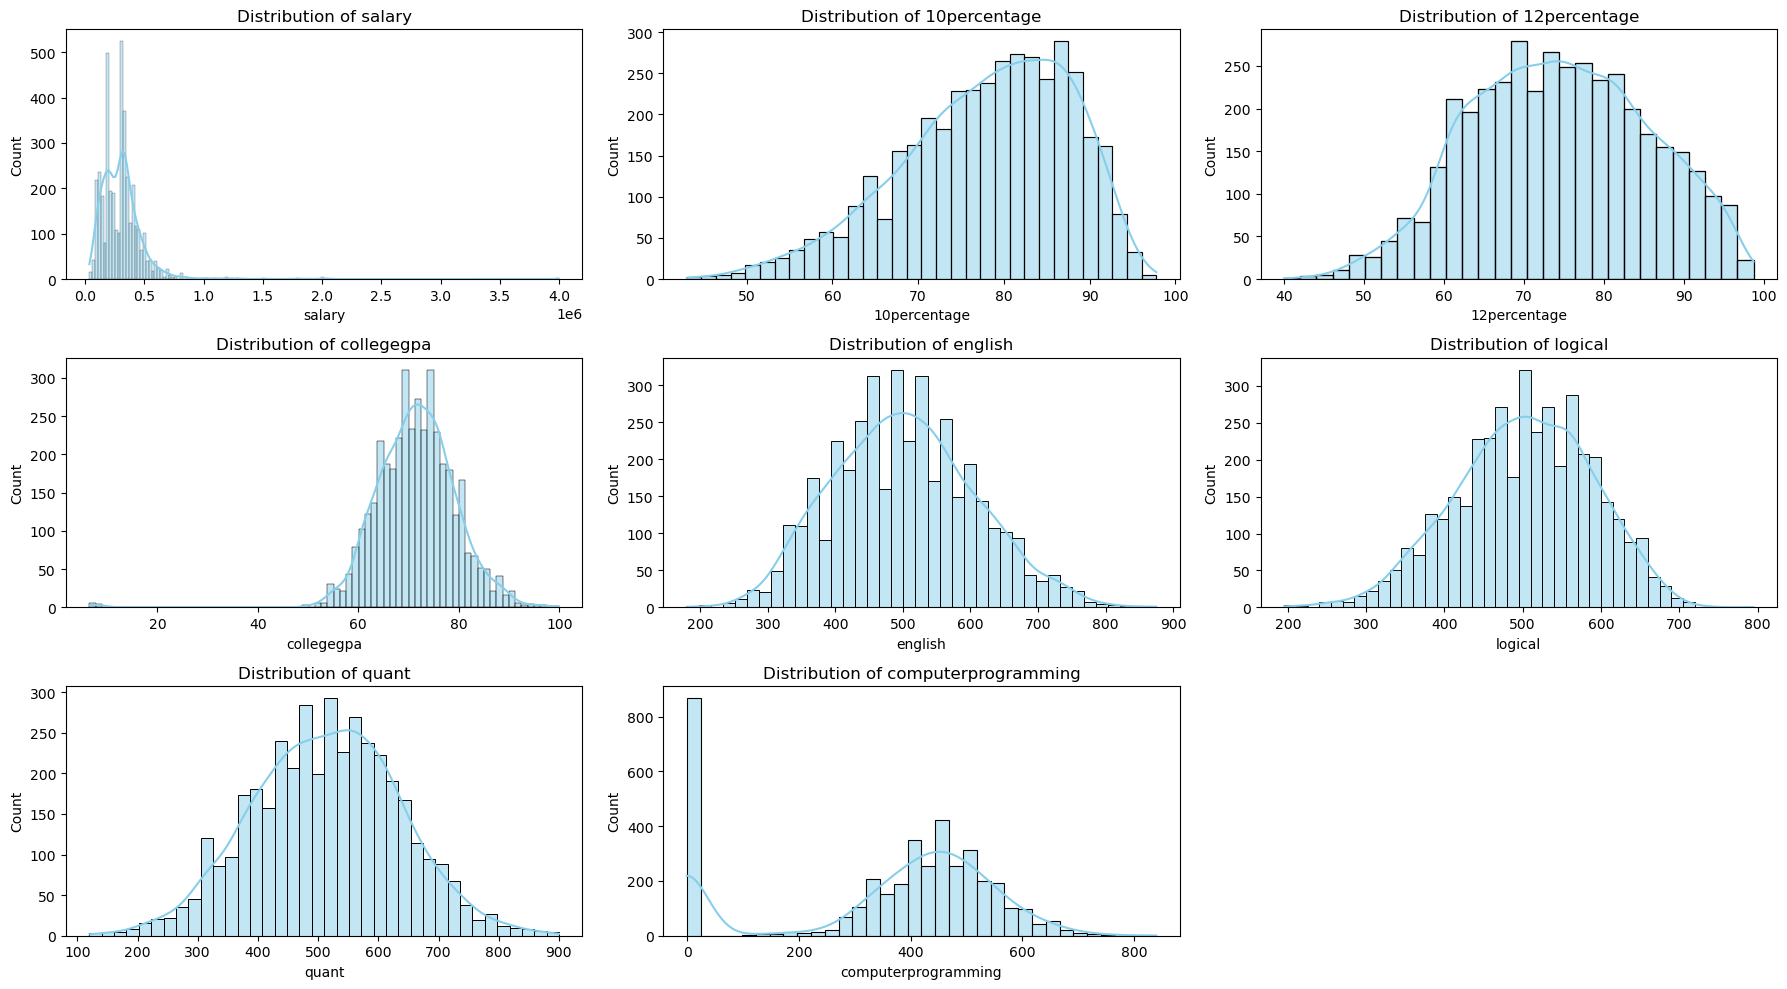

In [16]:
# Visualization: Histogram of Numerical Columns
numerical_columns = ['salary', '10percentage', '12percentage', 'collegegpa', 'english', 'logical', 'quant', 'computerprogramming']
plt.figure(figsize=(18, 10))
for i, col in enumerate(numerical_columns):
    plt.subplot(3, 3, i + 1)
    sns.histplot(data_cleaned[col].dropna(), kde=True, color='skyblue')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

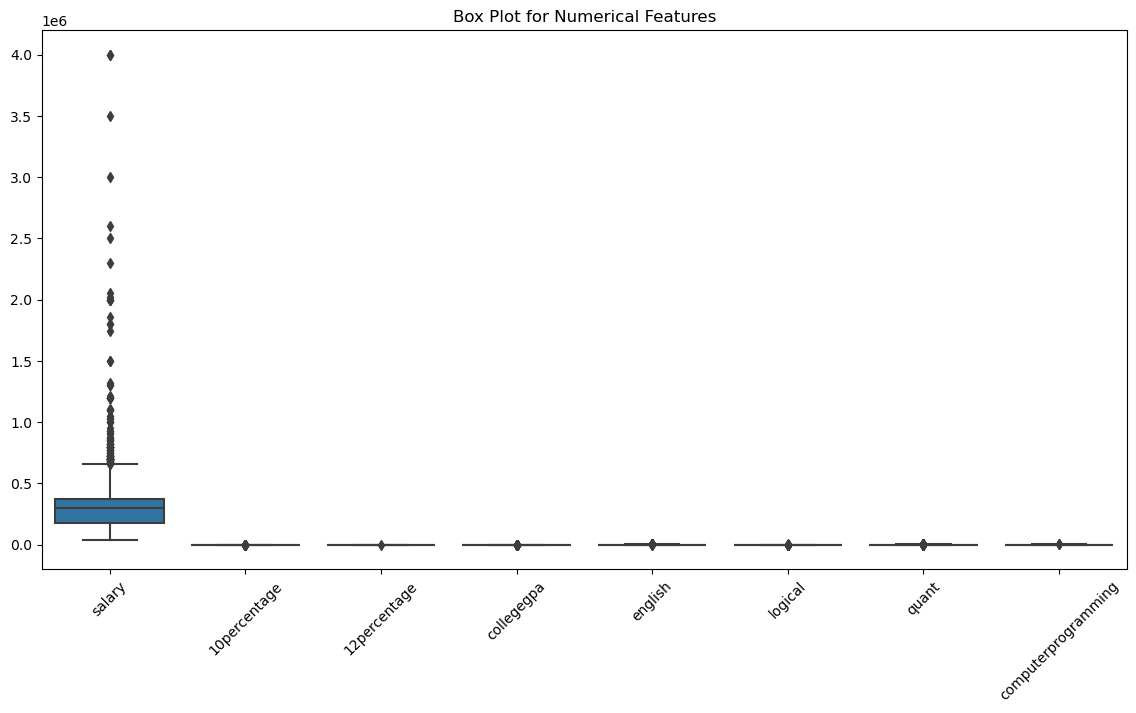

In [17]:
# Visualization: Box Plot for Numerical Columns
plt.figure(figsize=(14, 7))
sns.boxplot(data=data_cleaned[numerical_columns])
plt.title('Box Plot for Numerical Features')
plt.xticks(rotation=45)
plt.show()

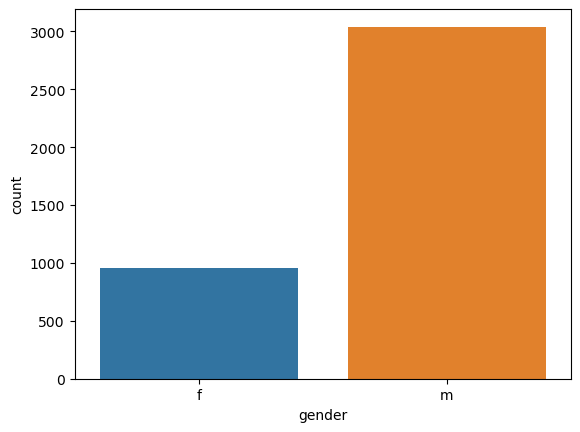

In [18]:
# Frequency Distribution of Categorical Variables
sns.countplot(x='gender', data=data_cleaned)
plt.show()

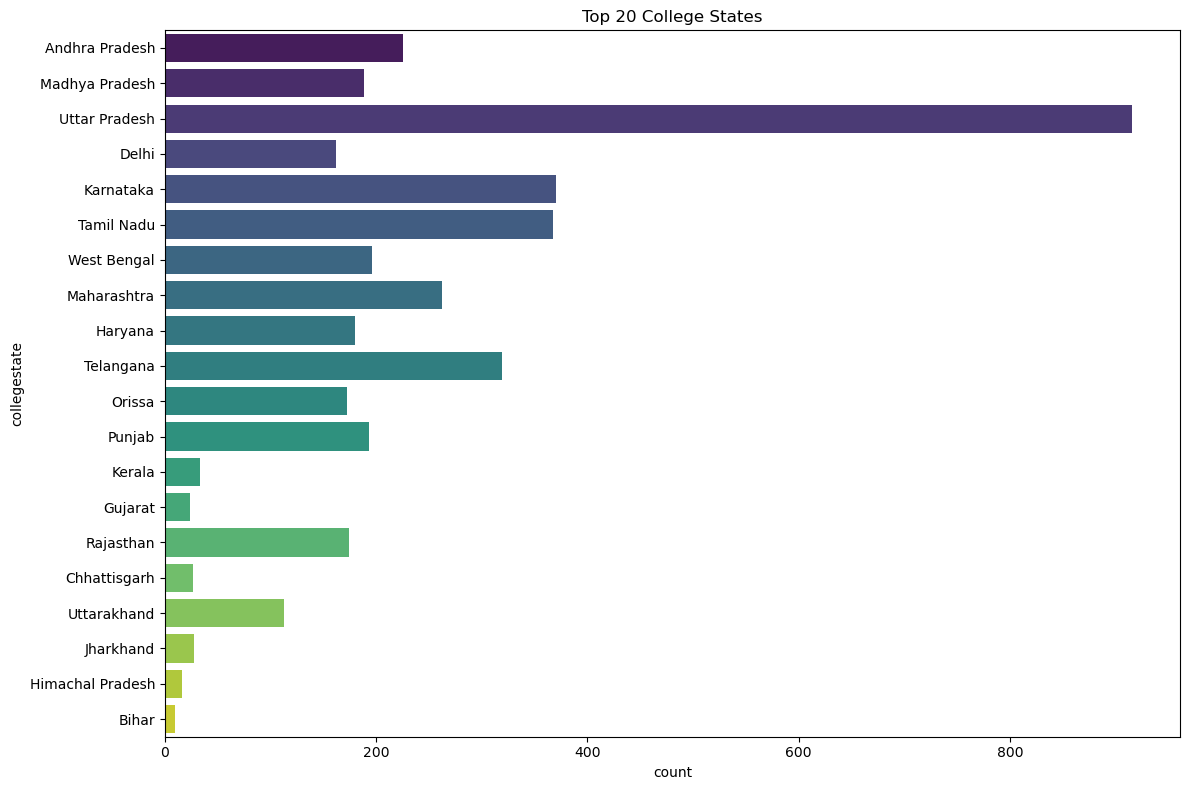

In [19]:
# Top states by college location
top_collegestates = data_cleaned['collegestate'].value_counts().nlargest(20)
plt.figure(figsize=(12, 8))
sns.countplot(y='collegestate', data=data_cleaned[data_cleaned['collegestate'].isin(top_collegestates.index)], palette='viridis')
plt.title('Top 20 College States')
plt.tight_layout()
plt.show()


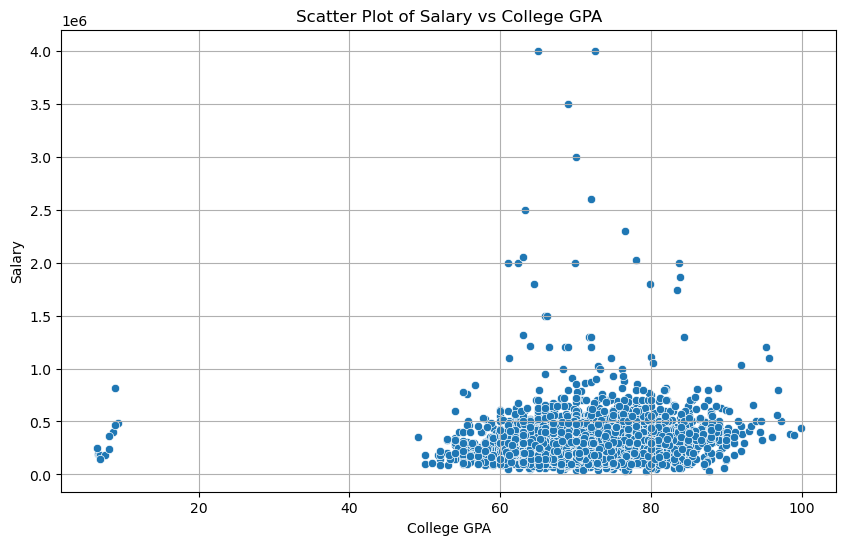

In [20]:
# Scatter plot of Salary vs College GPA
plt.figure(figsize=(10, 6))
sns.scatterplot(x='collegegpa', y='salary', data=data_cleaned)
plt.title('Scatter Plot of Salary vs College GPA')
plt.xlabel('College GPA')
plt.ylabel('Salary')
plt.grid(True)
plt.show()

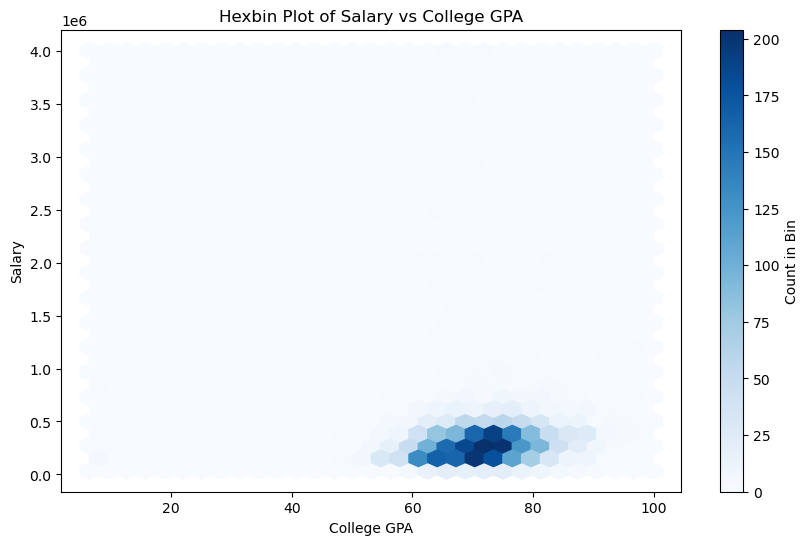

In [21]:
# Bivariate Analysis - Hexbin Plot of Salary vs College GPA
plt.figure(figsize=(10, 6))
plt.hexbin(data_cleaned['collegegpa'], data_cleaned['salary'], gridsize=30, cmap='Blues')
plt.colorbar(label='Count in Bin')
plt.title('Hexbin Plot of Salary vs College GPA')
plt.xlabel('College GPA')
plt.ylabel('Salary')
plt.show()

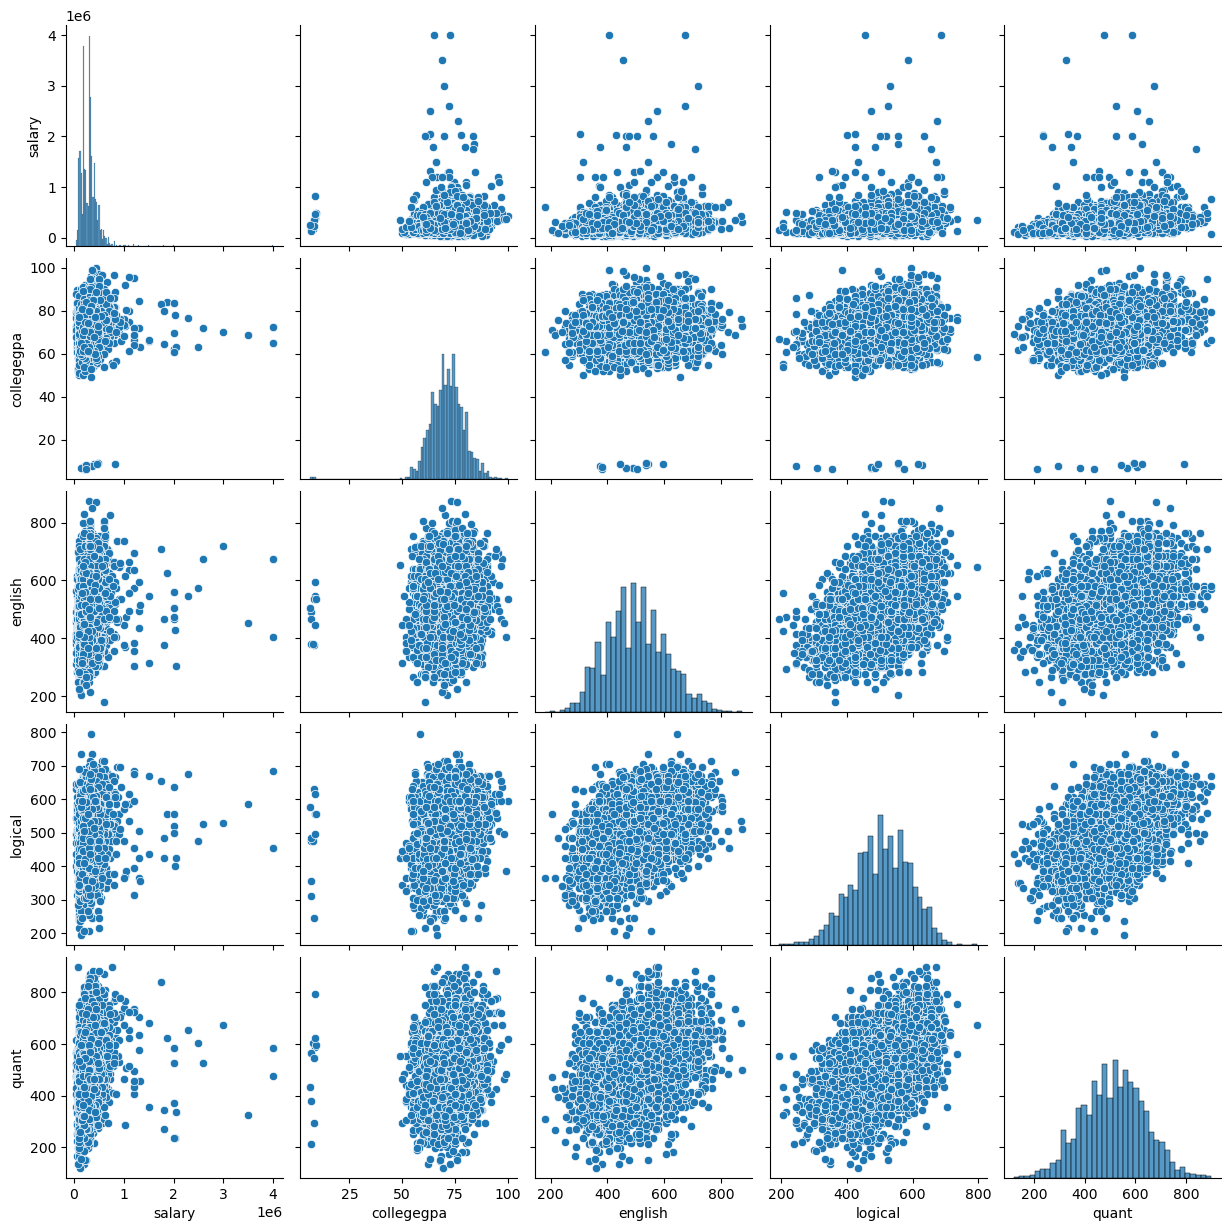

In [22]:
# Pair Plot of Selected Numerical Columns
numerical_cols_for_pair = ['salary', 'collegegpa', 'english', 'logical', 'quant']
sns.pairplot(data_cleaned[numerical_cols_for_pair])
plt.show()

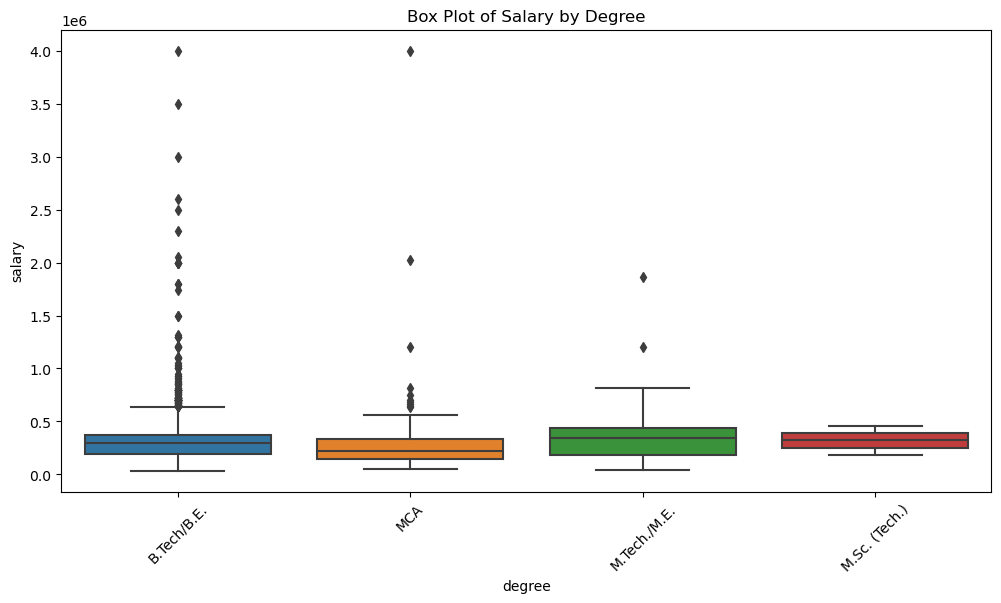

In [23]:
# Box Plot of Salary by Degree
plt.figure(figsize=(12, 6))
sns.boxplot(data=data_cleaned, x='degree', y='salary')
plt.title('Box Plot of Salary by Degree')
plt.xticks(rotation=45)
plt.show()

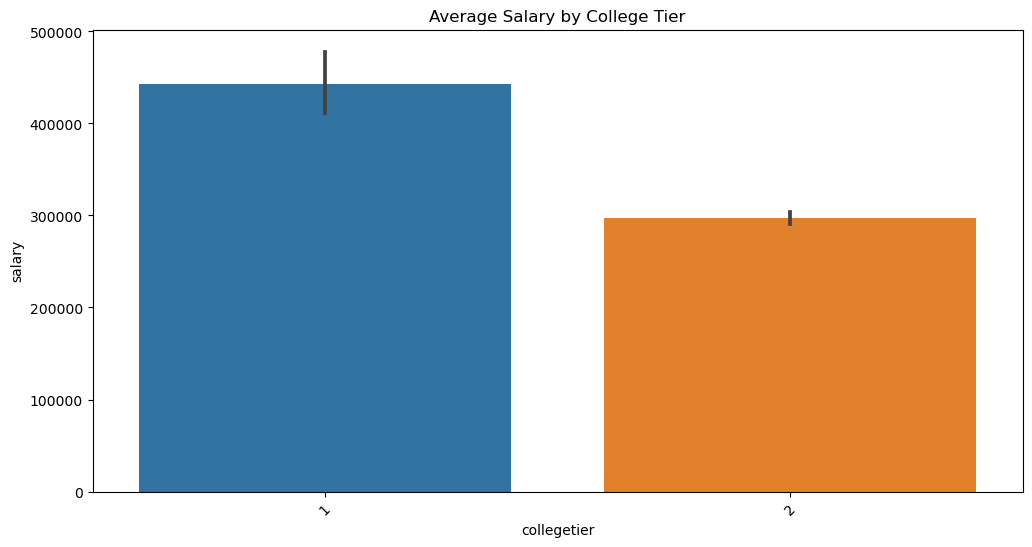

In [24]:
# Bar Plot of Average Salary by College Tier
plt.figure(figsize=(12, 6))
sns.barplot(data=data_cleaned, x='collegetier', y='salary', estimator=np.mean)
plt.title('Average Salary by College Tier')
plt.xticks(rotation=45)
plt.show()

In [25]:
# Contingency Table of Gender and Specialization
contingency_table = pd.crosstab(data_cleaned['gender'], data_cleaned['specialization'])
chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)
print(f"Chi-Squared Statistic: {chi2_stat}, P-value: {p_value}, Degrees of Freedom: {dof}")

Chi-Squared Statistic: 104.46891913608455, P-value: 1.2453868176976918e-06, Degrees of Freedom: 45


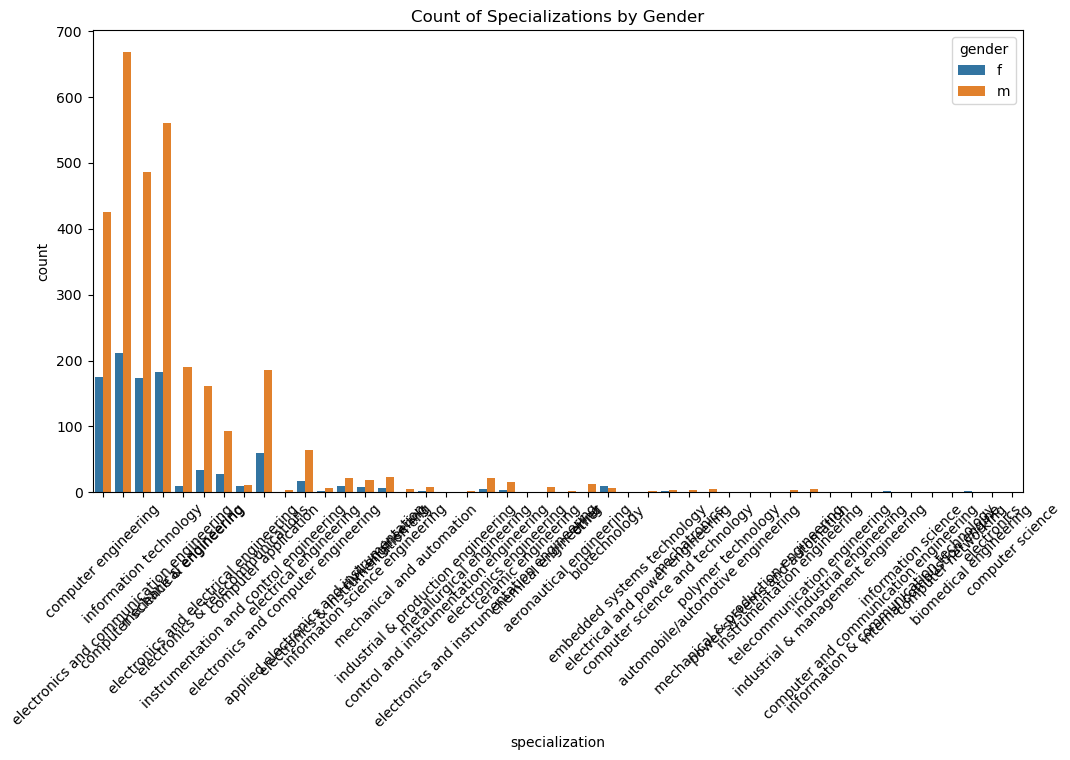

In [26]:
# Bar Plot for Specializations based on Gender
plt.figure(figsize=(12, 6))
sns.countplot(x='specialization', hue='gender', data=data_cleaned)
plt.xticks(rotation=45)
plt.title('Count of Specializations by Gender')
plt.show()

In [27]:
# T-test for Salary
job_titles = ['programming analyst', 'software engineer', 'hardware engineer', 'associate engineer']
filtered_data = data_cleaned[data_cleaned['designation'].isin(job_titles)]
if not filtered_data.empty:
    t_stat, p_val = stats.ttest_1samp(filtered_data['salary'], 2.5 * 100000)
    print(f"T-statistic: {t_stat}, P-value: {p_val}")
else:
    print("No data found for specified job titles")

T-statistic: 14.622985534577333, P-value: 3.6323413995240526e-41


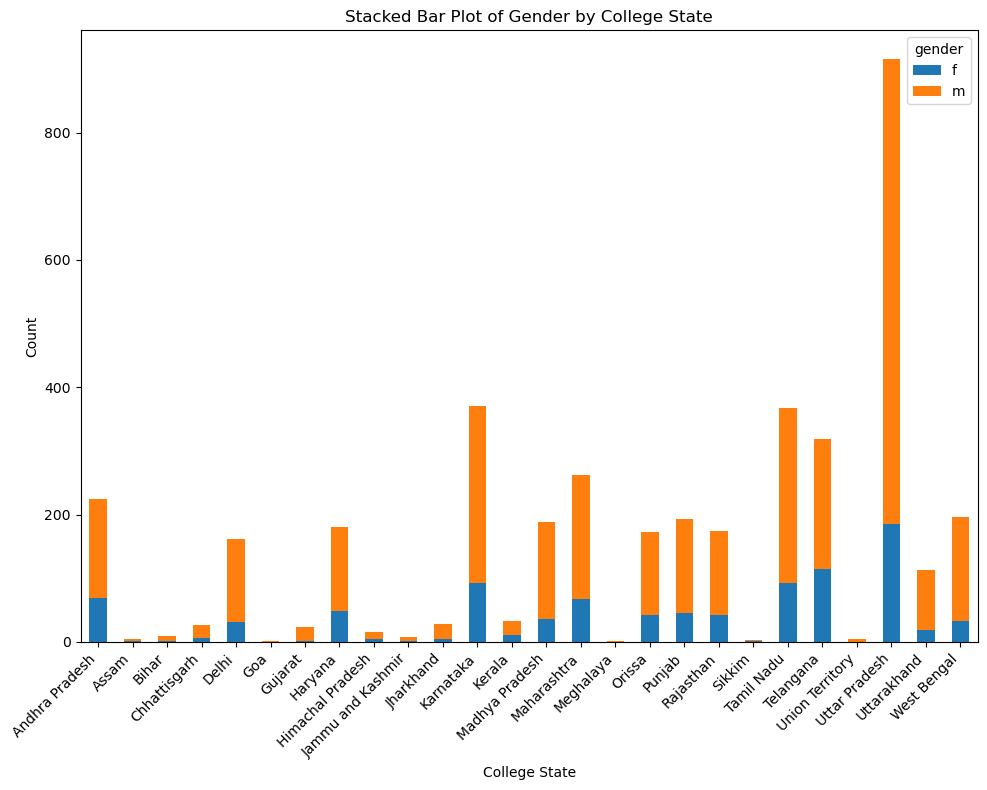

In [28]:
# Pivot Table for Gender by College State
pivot_table = data_cleaned.pivot_table(index='collegestate', columns='gender', values='salary', aggfunc='count').fillna(0)
pivot_table.plot(kind='bar', stacked=True, figsize=(10, 8))
plt.title('Stacked Bar Plot of Gender by College State')
plt.xlabel('College State')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()